In [1]:
import numpy as np
np.random.seed(42)
import plotly.express as px
import plotly.graph_objs as go
import torch
import matplotlib.pyplot as plt

# Helper Functions

In [2]:
def sample_grid(M=500, x_max=2.0):
    ii, jj = torch.meshgrid(torch.linspace(-x_max, x_max, M,),
                          torch.linspace(-x_max, x_max, M))
    X_all = torch.cat([ii.unsqueeze(-1),
                     jj.unsqueeze(-1)],
                     dim=-1).view(-1, 2)
    return X_all

# This function assigns a unique color based on position
def colorizer(x, y):
    """
    Map x-y coordinates to a rgb color
    """
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)

In [3]:
def plot_vector_points(vector_points, names, title="Vectors", width=600, height=600, font_size=15, axis_range = [-1,1]):
    layout1= go.Layout(title=go.layout.Title(text=title,x=0.5),
            xaxis={'title':'x', 'range':axis_range},
            yaxis={'title':'y','range':axis_range})
    point_plots = []
    for (x,y), name in zip(vector_points, names):
        point_plot=[
          go.Scatter(x=[0,x],
                     y=[0,y],
                     name=name,
                    ),
        ]
        point_plots += point_plot

    fig = go.Figure(data=point_plots, layout=layout1)
    fig.update_layout(
        autosize=False,
        width=width,
        height=height,
        title_text=title,
        titlefont={"size": 20},
        legend_title=None,
        showlegend=False,
        yaxis=dict(
            titlefont=dict(size=font_size),
            tickfont=dict(size=font_size),
        ),
        xaxis=dict(
            titlefont=dict(size=font_size),
            tickfont=dict(size=font_size),
        )
    )
    for (x,y), name in zip(vector_points, names):
        fig.add_annotation(x=x, y=y, text=f"{name}-> [{x:.2f}, {y:.2f}]", font=dict(
            size=font_size,
            ),
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",)
    return fig

def plot_grid(xygrids, titles, colors, figsize=(16,8)):
    assert len(xygrids)>1
    c = len(xygrids)
    fig, axes = plt.subplots(1, c, figsize=figsize, facecolor="w", sharey=True, sharex=True)
    # Plot grid points 
    # plt.figure()
    for ax, xygrid, title in zip(axes, xygrids, titles):
        ax.scatter(xygrid[:,0], xygrid[:,1], s=36, c=colors, edgecolor="none")
        # Set axis limits
        ax.grid(True)
        # ax1.axis("equal")
        ax.set_title(title)
        ax.set_aspect('equal')
    plt.show()

# Matrix Transformations

In [4]:
A = np.array([0.83, 0.51])
A

array([0.83, 0.51])

In [5]:
plot_vector_points([A], names=["A"])

Let's also plot the vector space grid and assign colors to each point so that we know whats happening to the space once it is transformed

In [6]:
xygrid = sample_grid(M =20, x_max=2).detach().numpy()

c:\Users\tacke\anaconda3\envs\modern_ts_2E\Lib\site-packages\torch\functional.py:512: UserWarning:

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3588.)



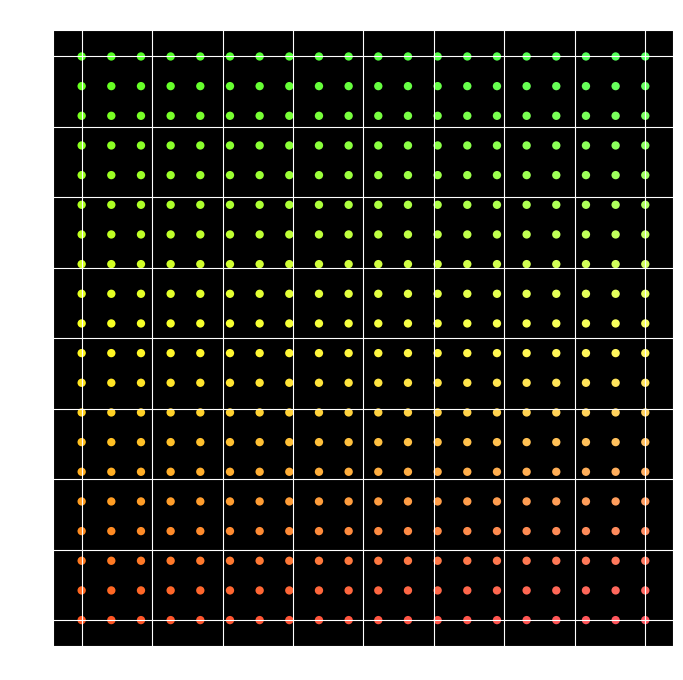

In [7]:
# Map grid coordinates to colors
colors = list(map(colorizer, xygrid[:,0], xygrid[:,1]))

# Plot grid points 
plt.figure(figsize=(8, 8), facecolor="w")
plt.scatter(xygrid[:,0], xygrid[:,1], s=36, c=colors, edgecolor="none")
# Set axis limits
plt.grid(True)
plt.axis("equal")
plt.title("Original grid in x-y space")
plt.show()

## Scaling

### Scaling down by 0.5

In [8]:
S = np.array([[0.5, 0], [0, 0.5]])
S

array([[0.5, 0. ],
       [0. , 0.5]])

In [9]:
# Matrix Multiplication between the vector A and matrix S
AT = S@A
AT

array([0.415, 0.255])

In [10]:
plot_vector_points([A, AT], names=["A", "A (Scaled)"])

We can see that the vector A is not scaled to another vector with same direction, but different magnitude

### Scaling down the Vector Space

In [11]:
# Let's apply the same transformation to all the points in our grid
xygrid_t = xygrid.copy()
for i in range(xygrid_t.shape[0]):
    xygrid_t[i,:] = S@xygrid_t[i,:]

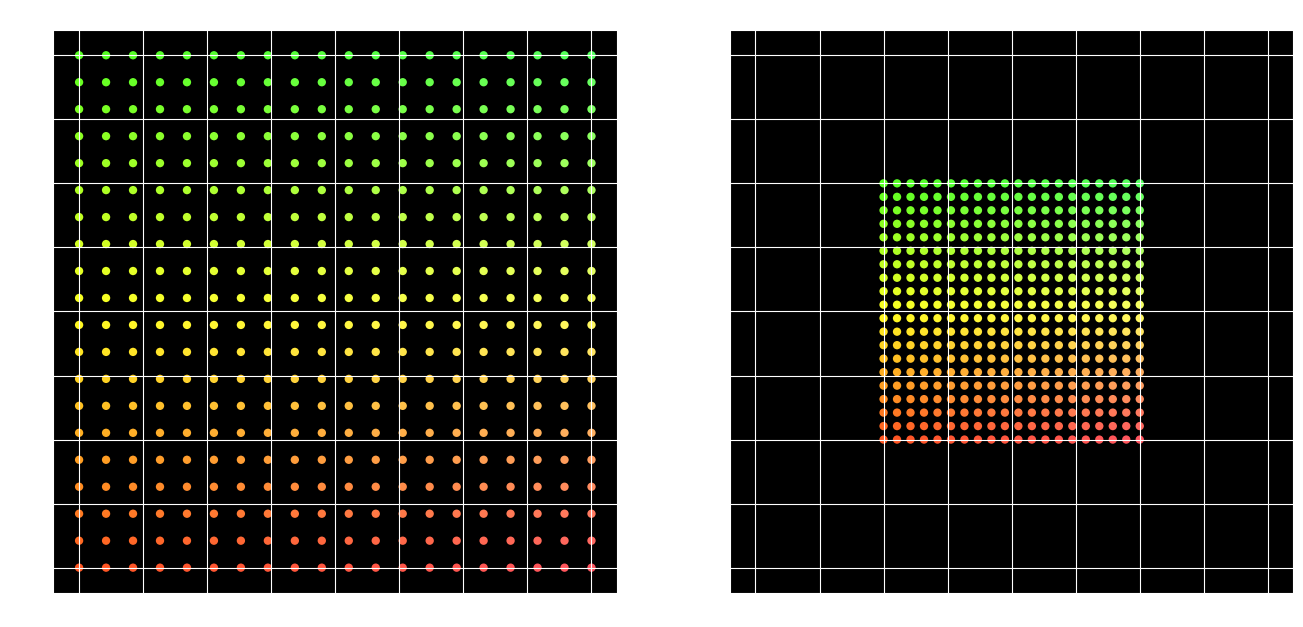

In [12]:
plot_grid([xygrid, xygrid_t], titles=["Original", "Scaled"], colors=colors)

## Reflection

### Reflection on X Axis

In [13]:
RX = np.array([[1, 0], [0, -1]])
RX

array([[ 1,  0],
       [ 0, -1]])

In [14]:
# Matrix Multiplication between the vector A and transformation matrix
ARX = RX@A
ARX

array([ 0.83, -0.51])

### Reflection on Y Axis

In [15]:
RY = np.array([[-1, 0], [0, 1]])
RY

array([[-1,  0],
       [ 0,  1]])

In [16]:
# Matrix Multiplication between the vector A and transformation matrix
ARY = RY@A
ARY

array([-0.83,  0.51])

In [17]:
plot_vector_points([A, ARX, ARY], names=["A", "A (Reflection X)", "A (Reflection Y)"], axis_range=[-1,1])

We can see the point A reflected on Y and X axis

### Reflection on X Axis on the Vector Space

In [18]:
xygrid_t = xygrid.copy()
for i in range(xygrid_t.shape[0]):
    xygrid_t[i,:] = RX@xygrid_t[i,:]

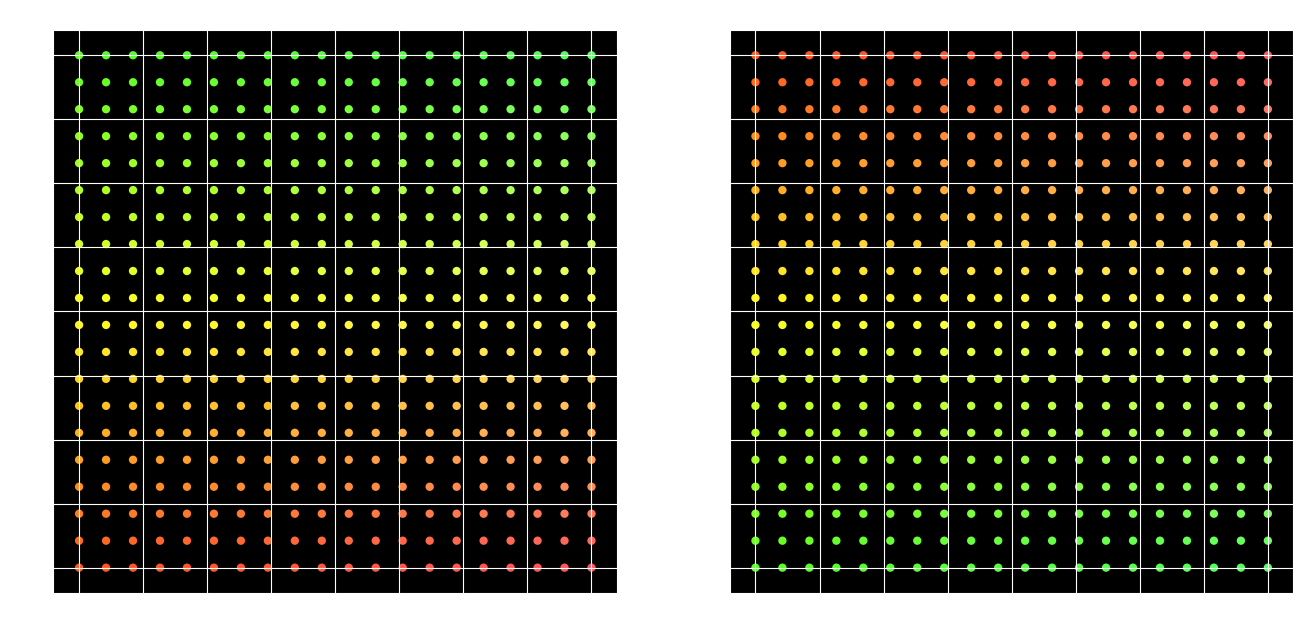

In [19]:
plot_grid([xygrid, xygrid_t], titles=["Original", "Reflection"], colors=colors)

Notice the colors flipped on X axis because of the transformation

## Shearing

### Shearing on Y Axis

In [20]:
SX = np.array([[1, 0], [0.5, 1]])
SX

array([[1. , 0. ],
       [0.5, 1. ]])

In [21]:
# Matrix Multiplication between the vector A and transformation matrix
ASX = SX@A
ASX

array([0.83 , 0.925])

In [22]:
plot_vector_points([A, ASX], names=["A", "A (Shear Y)"], axis_range=[-1.5,1.5])

Notice the shearing movement along y-axis

### Shearing on Y Axis on the Vector Space

In [23]:
xygrid_t = xygrid.copy()
for i in range(xygrid_t.shape[0]):
    xygrid_t[i,:] = SX@xygrid_t[i,:]

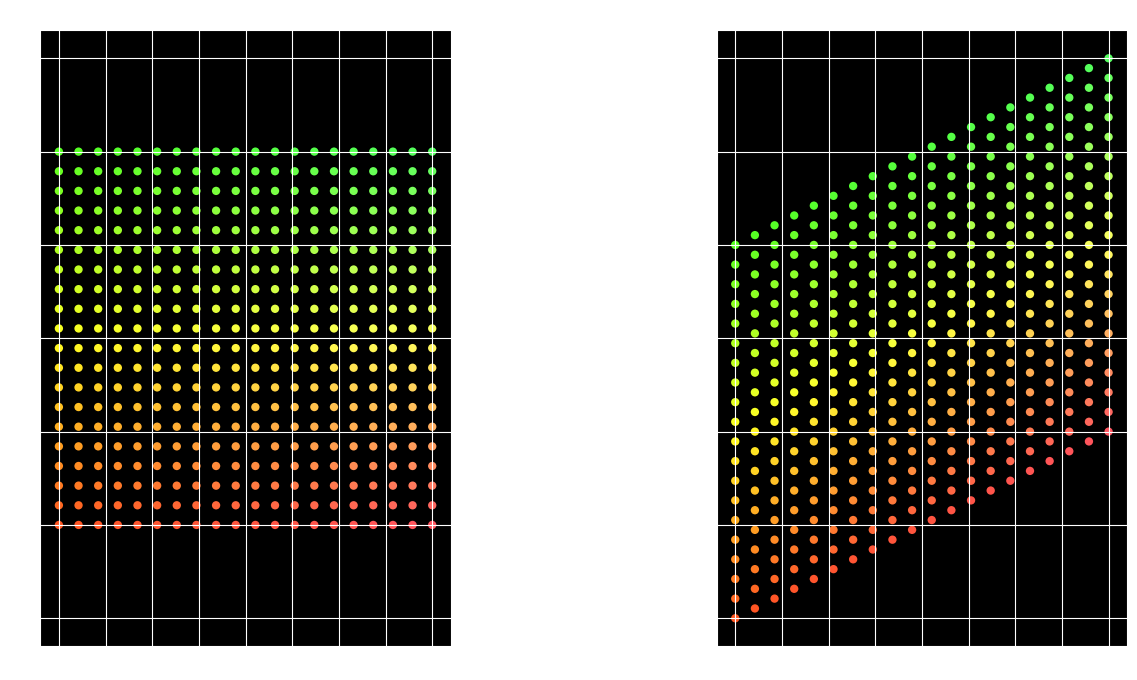

In [24]:
plot_grid([xygrid, xygrid_t], titles=["Original", "Shearing"], colors=colors)

## Rotation

### Rotating 30 and 90 Degrees

In [25]:
# Radians for 30 degrees
theta = np.radians(30)
RT = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
RT

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [26]:
# Matrix Multiplication between the vector A and transformation matrix
ART = RT@A
ART

array([0.46380109, 0.85667296])

In [27]:
# Radians for 90 degrees
theta = np.radians(90)
RT2 = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
RT2

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [28]:
# Matrix Multiplication between the vector A and transformation matrix
ART2 = RT2@A
ART2

array([-0.51,  0.83])

In [29]:
plot_vector_points([A, ART, ART2], names=["A", "A Rotated 30", "A Rotated 90"], axis_range=[-1,1])

### Rotating 30 degrees the Vector Space

In [30]:
xygrid_t = xygrid.copy()
for i in range(xygrid_t.shape[0]):
    xygrid_t[i,:] = RT@xygrid_t[i,:]

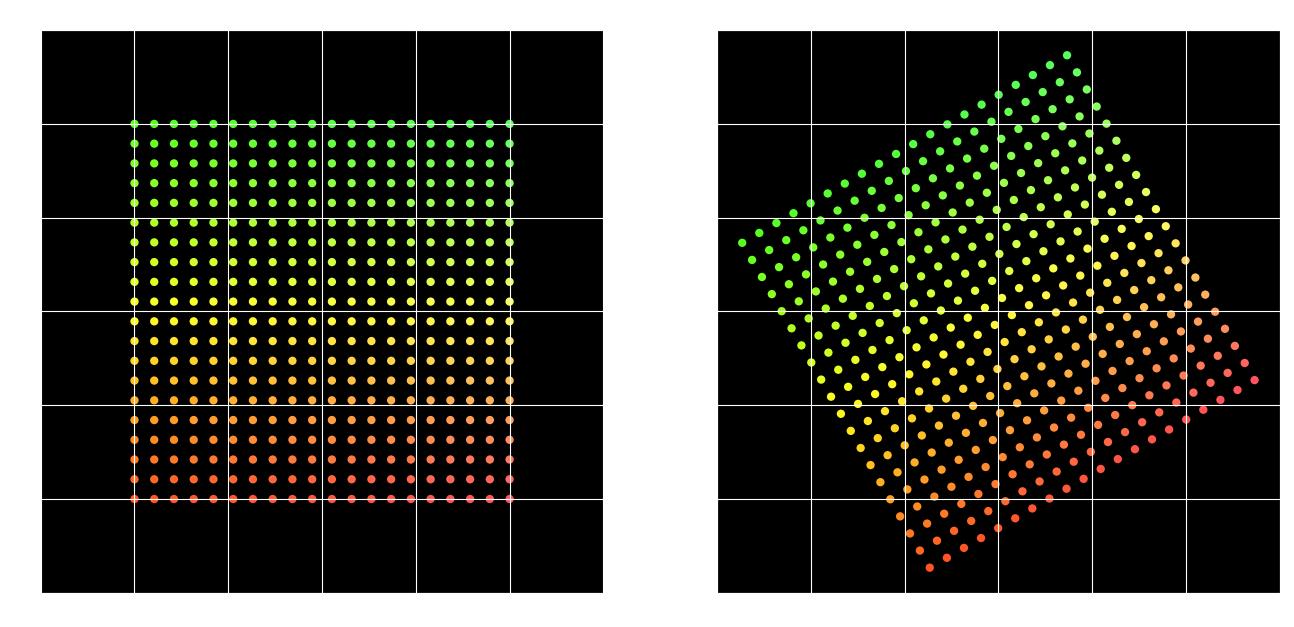

In [31]:
plot_grid([xygrid, xygrid_t], titles=["Original", "Rotation (30 degrees)"], colors=colors)